## PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of images that belong to the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

## Visualizing Data

[1]


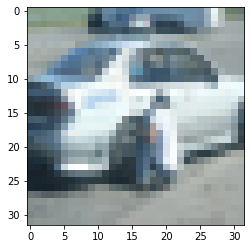

In [7]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i])

Here, we will make a grid of our images.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


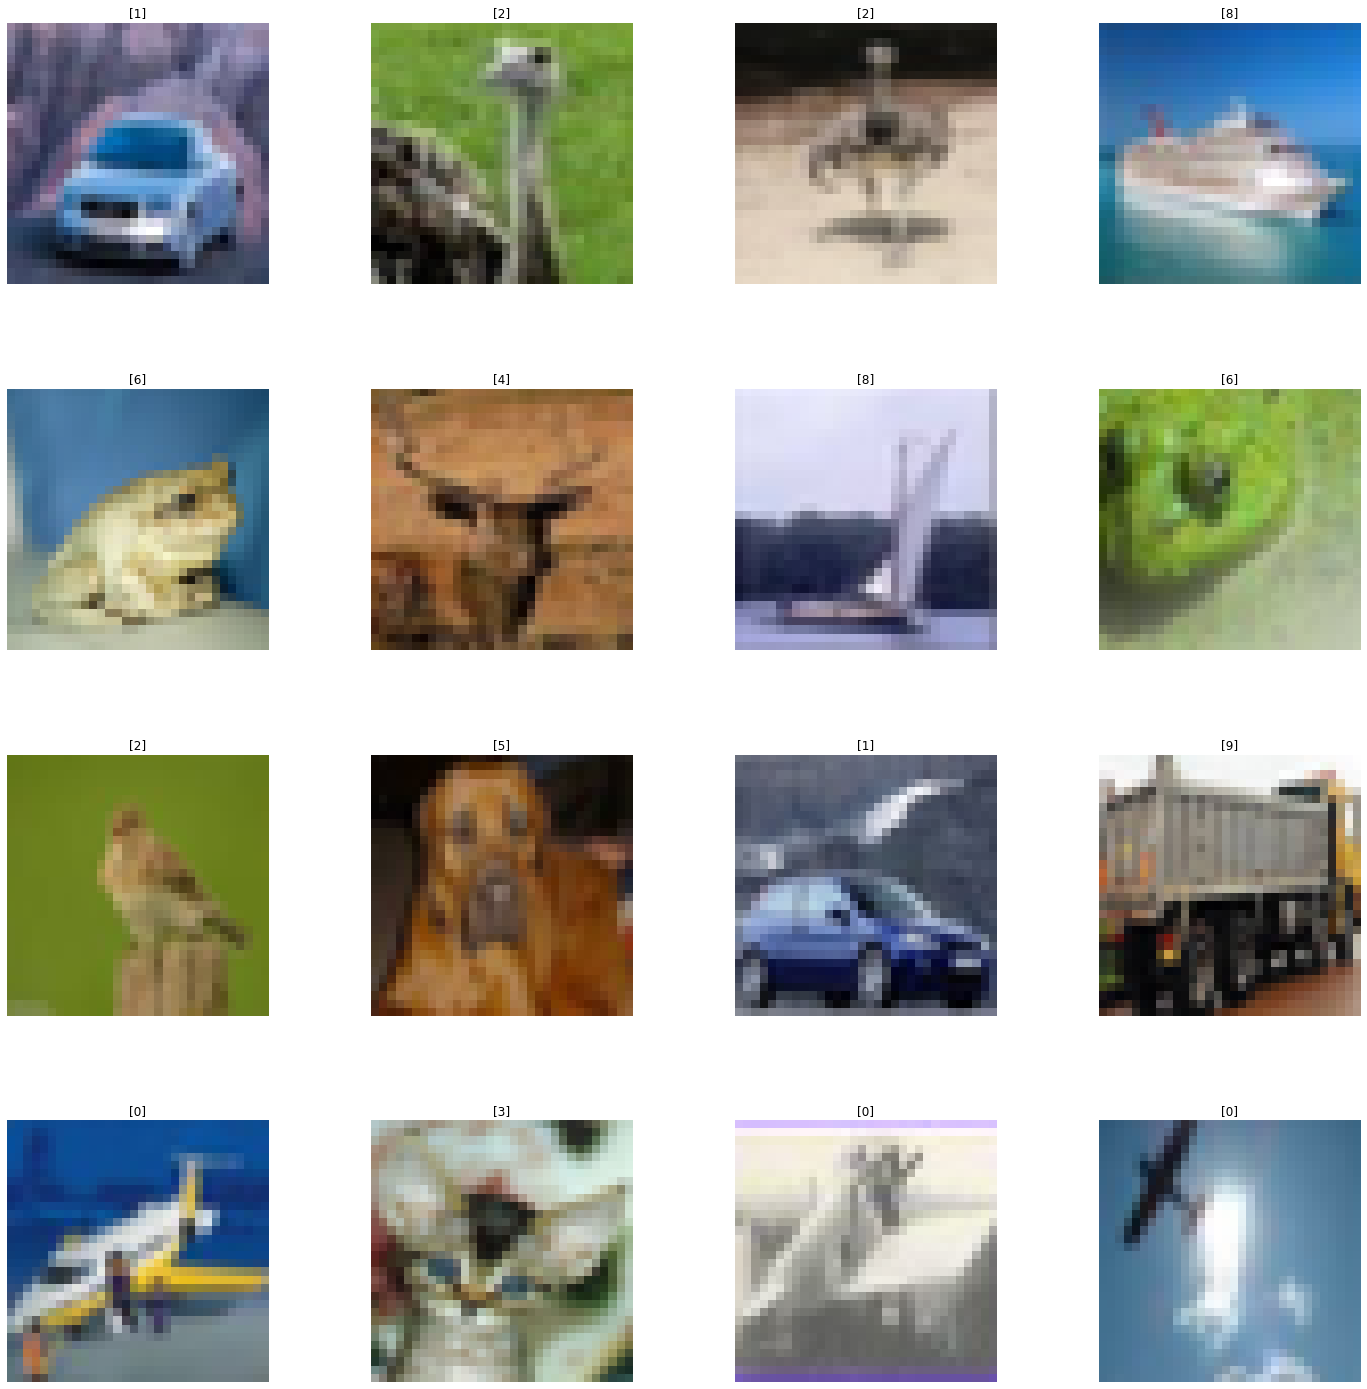

In [8]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [9]:
n_training

50000

## Data Preprocessing

Let's convert the images to a float type. We do this to use the images later in a float format.

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
number_cat = 10 #number of categories

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

We need to convert the y_train to binary values to have 10 cateogories for our neural network.

In [13]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Now we have our 10 categories. Let's do the same for y_test.

In [15]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Now we'll normalize the data.

Note that the numbers in X go from 0 to 255 to represent the colors in the images.

So we divide by 255 to have the values from 0 to 1.

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_train.shape

(50000, 32, 32, 3)

What if we wanted 32, 32, 3 as our dimensions for our input shape?

In [20]:
Input_shape = X_train.shape[1:]

In [21]:
Input_shape

(32, 32, 3)

## Model Training

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Conv2D is for our convelution process.

MaxPooling2D will be used for downsampling to reduce the dimensionality of the image to reduce our features.

AveragePooling2D will be used to average the values of the pixels.

Dense will create our fully connected ANN.

Flatten will flatten our array (flatten our feature maps into one array of neurons).

Dropout to perform regularization which drops some neurons along with the weights to improve the generalization capability of the network.

Adam will be used as an optimizer to obtain the weights of the network.

TensorBoard will rely on Tensorflow on the backend.

In [23]:
cnn_model = Sequential()
#Now we will add our layers.
#Kernel_size is our specified matrix.
#Since it is our first layer, we need to specify the input_shape
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')) #Here is our second layer
cnn_model.add(MaxPooling2D(2,2)) #2,2 is downsampling our features.
cnn_model.add(Dropout(0.4)) #We want to dropuout 40% of the neurons

#Now we will build 2 more layers to increase the depth of the network.
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

#Now we add the fully connected ANN. We use Dense for this.

cnn_model.add(Dense(units = 1024, activation = 'relu')) #Hidden Layer 1

cnn_model.add(Dense(units = 1024, activation = 'relu')) #Hidden Layer 2

#Now we need to specify how many units we need in the output layer.
#Since we are using classification, we want to specify our data by 10 classes.
#Since our output needs to be 0's or 1's, softamx would be ideal for this case.
#Relu can't be used b/c that would be a case of when the output is continuos, similar to regression.

cnn_model.add(Dense(units = 10, activation = 'softmax')) #Output Layer

Now we will compile our model and fit it to the training data.

For loss, we need to specify how we are using categorical classification. So we use categorical_crossentropy.

Our optimizer is root mean squared error. lr is how fast the network will be trained.

Metrics will be accuracy.

In [24]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

Here, we pass along:

The training data

Our batch size, which is how many images will be fed to the network at once.

We want 1 epoch.

Shuffle will shuffle the images so that the network is exposed to a different order of images. This get rid of the dependency of the order of the images. This will help the network generalize better.

In [25]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 1, shuffle = True)

1563/1563 [==============================] - 172s 110ms/step - loss: 1.6348 - accuracy: 0.4117


## Model Evaluation

In [26]:
X_test.shape

(10000, 32, 32, 3)

In [27]:
y_test.shape

(10000, 10)

In [28]:
y_test_save = y_test #We make this object to use it later.

In [29]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 6s 19ms/step - loss: 1.2396 - accuracy: 0.5650
Test Accuracy: 0.5649999976158142


Now we will take the trained model and predict it on X_test.

In [30]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 4, 7])

In [31]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

Let's turn these decimal values back to its original form.

In [32]:
y_test = y_test.argmax(1)

In [33]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [34]:
y_test.shape

(10000,)

Now we will evaluate the model by visualizing the images.

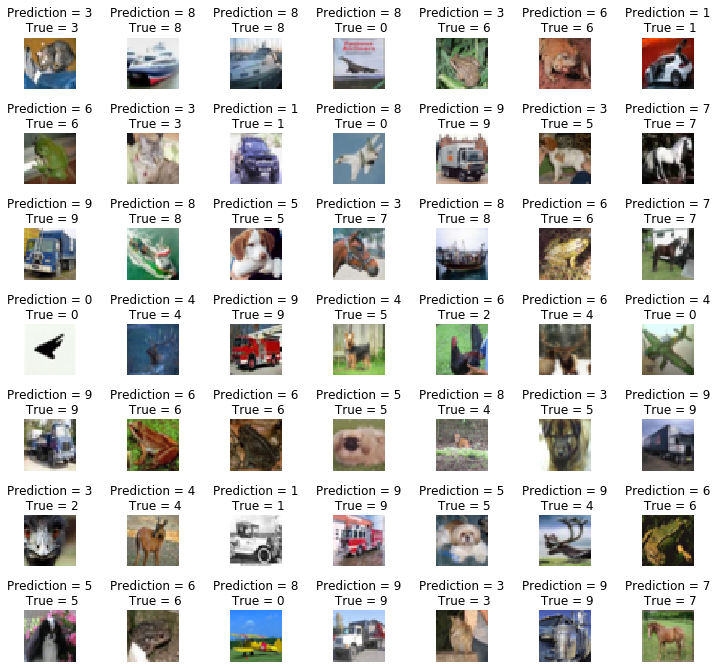

In [35]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

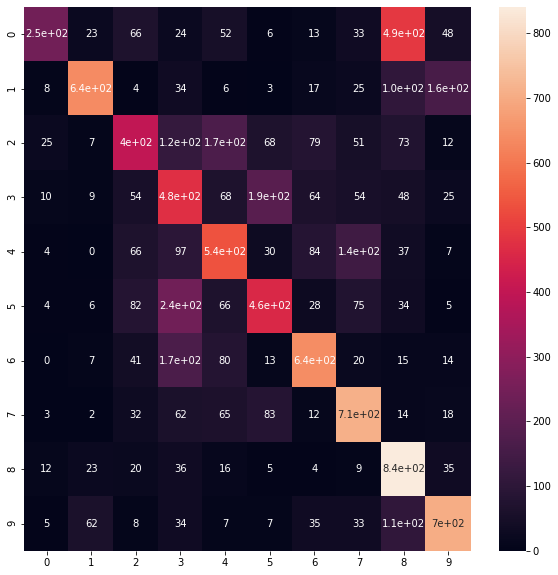

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
_=sns.heatmap(cm, annot = True)

Here, the rows are the predictions, and the columns are the true class.

If they match, then those values will be in the diagonal.

All of the other values are misclassifications.

## Saving the Model

In [37]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

## Model Training Using Augmented Data

In [38]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

We can change the images by using the arguments in ImageDataGenerator.

In [39]:
datagen.fit(X_train)

In [40]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
1563/1563 [==============================] - 176s 113ms/step - loss: 1.7873 - accuracy: 0.3573
Epoch 2/2
1563/1563 [==============================] - 188s 120ms/step - loss: 1.6685 - accuracy: 0.4018


In [41]:
X_test.shape

(10000, 32, 32, 3)

In [42]:
y_test_save.shape

(10000, 10)

In [43]:
score = cnn_model.evaluate(X_test, y_test_save)
print('Test accuracy', score[1])

313/313 [==============================] - 6s 21ms/step - loss: 1.9805 - accuracy: 0.4156
Test accuracy 0.4156000018119812


In [44]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)